In [298]:
!pip install imblearn

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

Dataset Link : https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis

In [300]:
df=pd.read_csv('customer_churn_data.csv')

In [301]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [303]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [304]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [305]:
df['InternetService']=df['InternetService'].fillna(method='ffill')

In [306]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    563
DSL            437
Name: count, dtype: int64

In [307]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [308]:
df.duplicated().sum()

np.int64(0)

In [309]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [310]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    563
DSL            437
Name: count, dtype: int64

In [311]:
df['ContractType'].value_counts()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

In [312]:
df['TechSupport'].value_counts()

TechSupport
Yes    506
No     494
Name: count, dtype: int64

In [313]:
numeric_cols=df.select_dtypes(exclude=['object'])

In [314]:
corr_matrix=numeric_cols.corr()
corr_matrix

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


<Axes: >

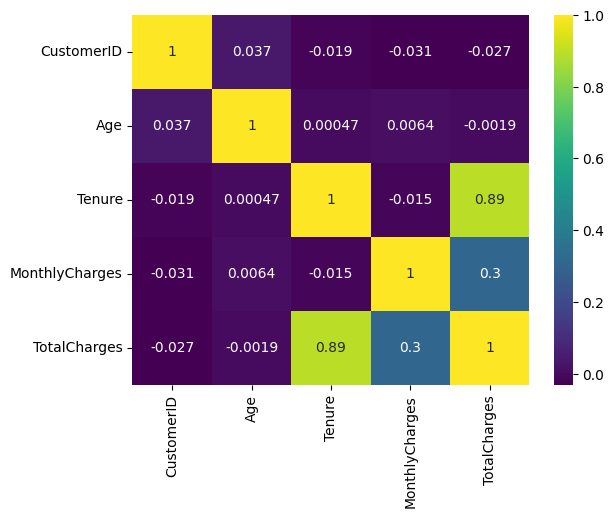

In [315]:
sns.heatmap(corr_matrix,cmap='viridis',annot=True)

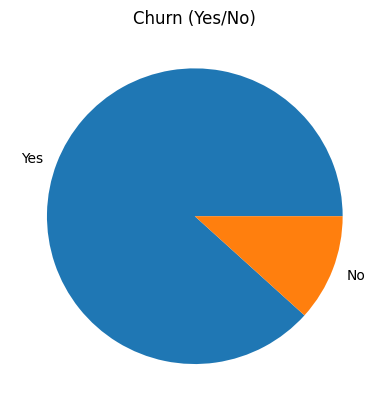

In [316]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [317]:
df.groupby("Churn")['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [318]:
df.groupby(["Churn","Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [319]:
df.groupby("Churn")['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [320]:
df.groupby("Churn")['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [321]:
df.groupby("ContractType")['MonthlyCharges'].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

At the lower terms we can see that the monthly charge average decreases

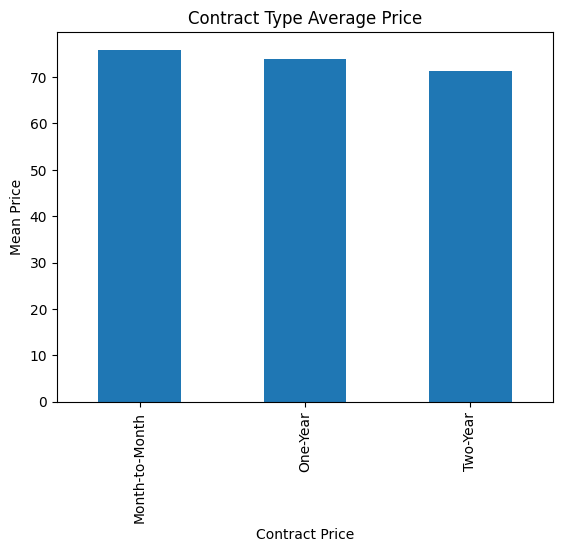

In [322]:
df.groupby("ContractType")['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('Contract Price')
plt.title('Contract Type Average Price')
plt.show()

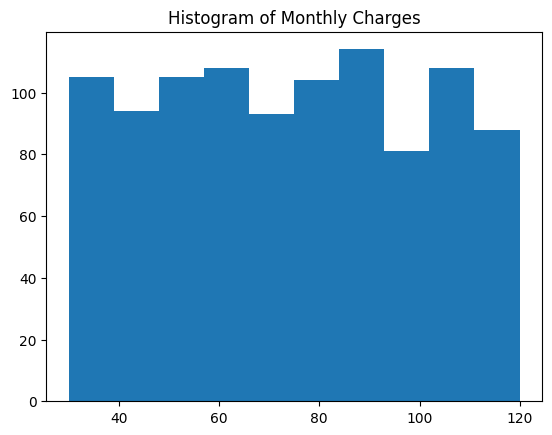

In [323]:
plt.hist(df['MonthlyCharges'],bins=10)
plt.title('Histogram of Monthly Charges')
plt.show()

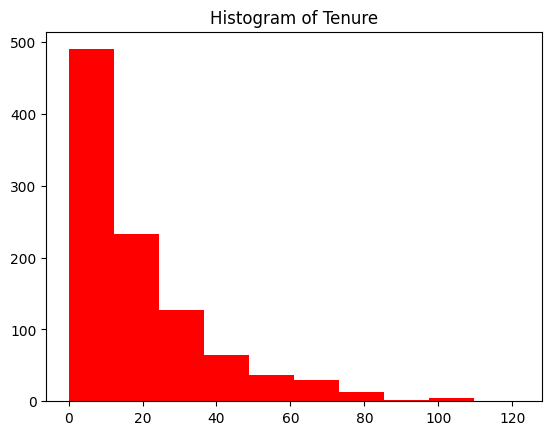

In [324]:
plt.hist(df['Tenure'],color='red')
plt.title('Histogram of Tenure')
plt.show()

In [325]:
col_list=list(df.columns)
col_list

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'MonthlyCharges',
 'ContractType',
 'InternetService',
 'TotalCharges',
 'TechSupport',
 'Churn']

In [326]:
y=df['Churn']
x=df[['Age','Gender','Tenure','MonthlyCharges','ContractType','InternetService','TechSupport']]
x

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,No
3,60,Female,8,102.34,One-Year,DSL,Yes
4,42,Male,32,69.01,Month-to-Month,DSL,No
...,...,...,...,...,...,...,...
995,42,Male,41,37.14,Month-to-Month,Fiber Optic,Yes
996,62,Male,9,80.93,Month-to-Month,Fiber Optic,No
997,51,Female,15,111.72,Month-to-Month,Fiber Optic,Yes
998,39,Male,68,65.67,One-Year,Fiber Optic,No


In [327]:
y.value_counts()['No']/(y.value_counts()['Yes']+y.value_counts()['No'])*100

np.float64(11.700000000000001)

In [328]:
x['Gender']=x['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [329]:
le=LabelEncoder()

text_cols=x.select_dtypes(include=['object'])
for cols in text_cols:
  x[cols]=le.fit_transform(x[cols])
  
x

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport
0,49,0,4,88.35,0,1,1
1,43,0,0,36.67,0,1,1
2,51,1,2,63.79,0,1,0
3,60,1,8,102.34,1,0,1
4,42,0,32,69.01,0,0,0
...,...,...,...,...,...,...,...
995,42,0,41,37.14,0,1,1
996,62,0,9,80.93,0,1,0
997,51,1,15,111.72,0,1,1
998,39,0,68,65.67,1,1,0


In [330]:
y=y.apply(lambda x:1 if x=='Yes' else 0)

In [331]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 7)
(300, 7)
(700,)
(300,)


In [332]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_train

array([[-1.11440015, -1.07417231, -0.56006137, ...,  0.36981987,
         0.85096294, -1.02020406],
       [ 0.45728576,  0.93094934,  1.20807005, ...,  0.36981987,
        -1.1751393 ,  0.98019606],
       [-0.59050485, -1.07417231, -0.77438033, ..., -0.8929797 ,
         0.85096294,  0.98019606],
       ...,
       [-0.27616767,  0.93094934, -0.61364111, ...,  1.63261945,
         0.85096294, -1.02020406],
       [ 0.98118106,  0.93094934, -0.66722085, ...,  0.36981987,
        -1.1751393 , -1.02020406],
       [ 0.14294858, -1.07417231, -0.56006137, ..., -0.8929797 ,
         0.85096294, -1.02020406]], shape=(700, 7))

In [333]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [334]:
X_test=scaler.fit_transform(X_test)

In [335]:
def modelperformance(predictions):
  print(f"Precision score on model is {precision_score(y_test,predictions)}")
  print(f"Recall score on model is {recall_score(y_test,predictions)}")
  print(f"F1 score on model is {f1_score(y_test,predictions)}")
  print(f"Classification Report of model is \n{classification_report(y_test,predictions)}")

In [336]:
classifier=BalancedRandomForestClassifier()

In [337]:
import warnings
warnings.filterwarnings("ignore")

In [338]:
classifier.fit(X_train,y_train)

BalancedRandomForestClassifier()

In [339]:
y_pred=classifier.predict(X_test)
modelperformance(y_pred)

Precision score on model is 1.0
Recall score on model is 0.977859778597786
F1 score on model is 0.9888059701492538
Classification Report of model is 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        29
           1       1.00      0.98      0.99       271

    accuracy                           0.98       300
   macro avg       0.91      0.99      0.95       300
weighted avg       0.98      0.98      0.98       300



In [340]:
logistic=LogisticRegression(class_weight={1:1,0:2})

In [341]:
logistic.fit(X_train,y_train)
logistic_pred=logistic.predict(X_test)
modelperformance(logistic_pred) 

Precision score on model is 0.96875
Recall score on model is 0.915129151291513
F1 score on model is 0.9411764705882353
Classification Report of model is 
              precision    recall  f1-score   support

           0       0.48      0.72      0.58        29
           1       0.97      0.92      0.94       271

    accuracy                           0.90       300
   macro avg       0.72      0.82      0.76       300
weighted avg       0.92      0.90      0.91       300



In [342]:
svc=SVC(class_weight={1:1,0:2})
param_grid={
  "C":[0.01,0.1,0.5,1],
  "kernel":["linear","rbf","poly"]
}

In [343]:
gridsvc=GridSearchCV(svc,param_grid=param_grid,cv=5)
gridsvc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight={0: 2, 1: 1}),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [344]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [345]:
svc_pred=gridsvc.predict(X_test)
modelperformance(svc_pred)

Precision score on model is 0.9776951672862454
Recall score on model is 0.9704797047970479
F1 score on model is 0.9740740740740741
Classification Report of model is 
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.98      0.97      0.97       271

    accuracy                           0.95       300
   macro avg       0.86      0.88      0.87       300
weighted avg       0.95      0.95      0.95       300



In [346]:
dtc=DecisionTreeClassifier(class_weight={1:1,0:2})
param_grid={
  "criterion":['gini','entropy'],
  "splitter":['best','random'],
  "max_depth":[None,10,20,30],
  "min_samples_split":[2,5,10],
  "min_samples_leaf":[1,2,4],
}

In [347]:
grid_tree=GridSearchCV(dtc,param_grid=param_grid,cv=5)
grid_tree.fit(X_train,y_train)
tree_pred=grid_tree.predict(X_test)
modelperformance(tree_pred)

Precision score on model is 1.0
Recall score on model is 0.977859778597786
F1 score on model is 0.9888059701492538
Classification Report of model is 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        29
           1       1.00      0.98      0.99       271

    accuracy                           0.98       300
   macro avg       0.91      0.99      0.95       300
weighted avg       0.98      0.98      0.98       300



In [348]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [349]:
best_model=gridsvc.best_estimator_
best_model

SVC(C=1, class_weight={0: 2, 1: 1})

In [350]:
joblib.dump(best_model,"model.pkl")

['model.pkl']